In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [72]:
dicom_df=pd.read_csv('/Users/anuvindpramod/Desktop/code/solo projects/Mammography-project/CBIS-DDSM/csv/dicom_info.csv')
dicom_df.describe().T


,count,mean,std,min,25%,50%,75%,max
AccessionNumber,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BitsAllocated,10237.0,1.321246e+01,3.812001,8.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,1.600000e+01
BitsStored,10237.0,1.321246e+01,3.812001,8.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,1.600000e+01
Columns,10237.0,2.179893e+03,1374.221082,6.800000e+01,4.530000e+02,2.728000e+03,3.112000e+03,5.431000e+03
ContentDate,10237.0,2.016047e+07,111.049745,2.016041e+07,2.016043e+07,2.016050e+07,2.016050e+07,2.017092e+07
ContentTime,10237.0,1.230613e+05,11391.443116,8.275551e+04,1.137396e+05,1.229359e+05,1.322114e+05,1.605079e+05
HighBit,10237.0,1.221246e+01,3.812001,7.000000e+00,7.000000e+00,1.500000e+01,1.500000e+01,1.500000e+01
InstanceNumber,10237.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
LargestImagePixelValue,10237.0,4.261229e+04,30995.808636,2.550000e+02,2.550000e+02,6.553500e+04,6.553500e+04,6.553500e+04
PatientBirthDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
dicom_df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [74]:
dicom_df.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [75]:
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [76]:
dicom_df.SeriesDescription.value_counts()

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

In [77]:
cropped_images = dicom_df[dicom_df.SeriesDescription=="cropped images"].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [78]:
ROI_mask=dicom_df[dicom_df.SeriesDescription=='ROI mask images'].image_path
Full_mammo=dicom_df[dicom_df.SeriesDescription=='full mammogram images'].image_path

ROI_mask.head(),Full_mammo.head()


(5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
 8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
 9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
 14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
 20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
 Name: image_path, dtype: object,
 1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
 2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
 11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
 12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
 15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
 Name: image_path, dtype: object)

In [79]:
def replace_path(sample,old_path, new_path):
    return sample.replace(old_path,new_path,regex=True)

def plot_samples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:5]):
        cropped_images_show =Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,5,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()


In [84]:
correct_dir='/Users/anuvindpramod/Desktop/code/solo projects/Mammography-project/CBIS-DDSM/jpeg'

cropped_images=replace_path(cropped_images,'CBIS-DDSM/jpeg',correct_dir)
print(cropped_images.iloc[0])


/Users/anuvindpramod/Desktop/code/solo projects/Mammography-project/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg


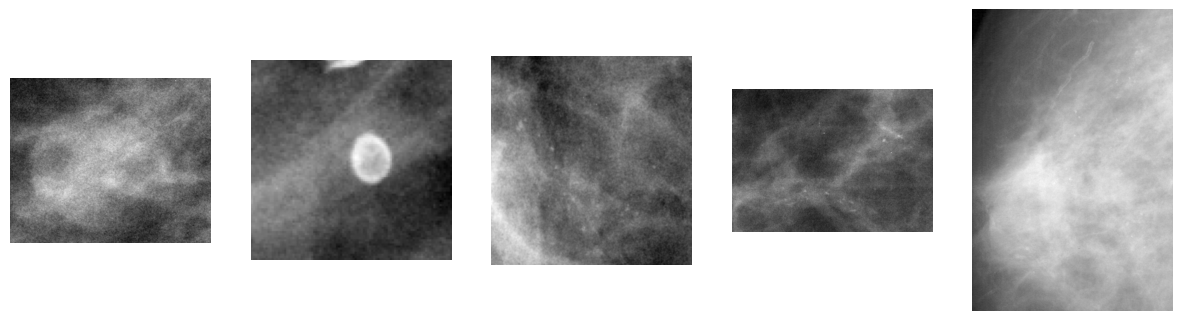

In [85]:
plot_samples(cropped_images,15,20)

/Users/anuvindpramod/Desktop/code/solo projects/Mammography-project/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg


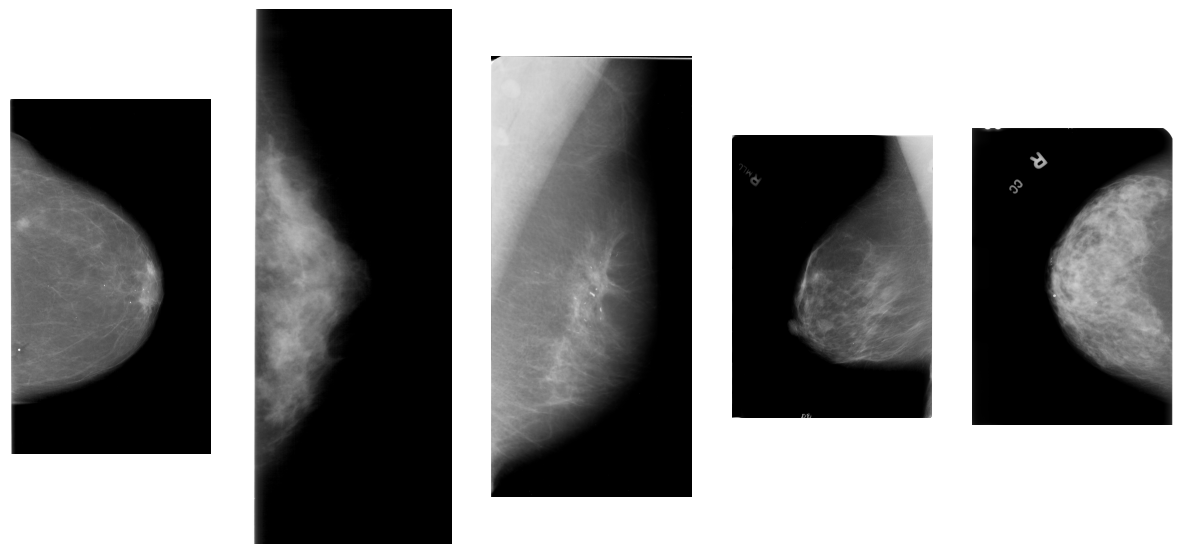

In [87]:
full_mammogram=replace_path(Full_mammo,'CBIS-DDSM/jpeg', correct_dir)
print(full_mammogram.iloc[0])
plot_samples(full_mammogram)


/Users/anuvindpramod/Desktop/code/solo projects/Mammography-project/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


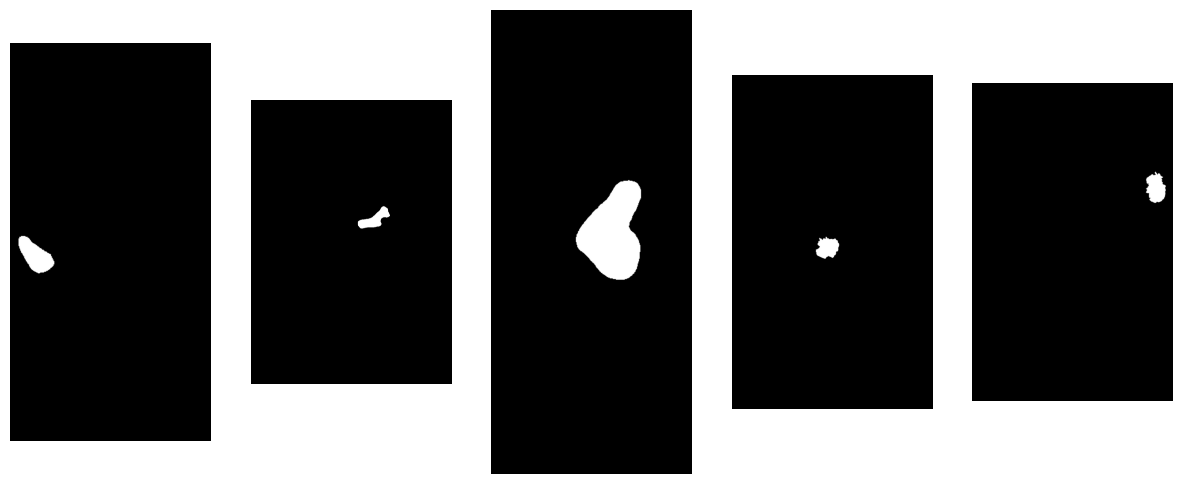

In [88]:
roi_mask=replace_path(ROI_mask,"CBIS-DDSM/jpeg", correct_dir)
print(roi_mask.iloc[0])
plot_samples(roi_mask)